In [28]:
import modules
import math
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
from astropy.table import Table


import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.rcParams['figure.figsize']=(16.,9.)

In [29]:
#Gaia.login()

In [30]:
# load the data
Roederer2014_stars = pd.read_csv('Roederer2014.txt', header=None, sep='\s+')[2:]

# reset indexing
Roederer2014_stars.reset_index(drop=True, inplace=True)

In [31]:
ras_roederer = Roederer2014_stars[0]
decs_roederer = Roederer2014_stars[1]
rv_roederer = Roederer2014_stars[13]


In [57]:
#M_H = Roederer2014_stars[12] total metal.
#Fe_H = Roederer2014_stars

In [58]:
Mg_H[4]

'-3.35'

In [32]:
gaia_matched_stars = []
#for i in range(0,len(Roederer2014_stars)-1):
for i in range(0,30):
    gaia_matched_stars.append(modules.get_stars(ras_roederer[i],decs_roederer[i], 0.1))

In [40]:
colnames = gaia_matched_stars[2].colnames
stars_table = Table(names = colnames)

In [41]:
for i in range(0,len(gaia_matched_stars)):  
        for j in range (0, len(gaia_matched_stars[i])-1):
            if abs(gaia_matched_stars[i]['dr2_radial_velocity'][j]) - abs(int(float(rv_roederer[i]))) < 10:
                stars_table.add_row(gaia_matched_stars[i][j])

In [44]:
# Use gal_uvw to calculate velocities 

U = []
V = []
W = []
prograde = []


count = 0
for i in stars_table:
    if i["parallax"] == 0:
        U.append(0)
        V.append(0)
        W.append(0)
    else:
        u, v, w = modules.gal_uvw(ra = i["ra"], dec = i["dec"], pmra = i["pmra"] , pmdec = i["pmdec"], vrad = i["dr2_radial_velocity"], plx = i["parallax"], lsr='yes')
        U.append(u)
        V.append(v)
        W.append(w)
            
print(count)  

#V = np.array(V) - [220] * len(V) #local standart of rest

T = np.sqrt(np.array(U)**2+np.array(W)**2)


for i in V:
    if i > 0:
        prograde.append(1)
    else:
        prograde.append(0)
        


0


In [ ]:
stars_table.add_column(U, name = 'U')
stars_table.add_column(V, name = 'V')
stars_table.add_column(W, name = 'W')
stars_table.add_column(T, name = 'T')

In [47]:
stars_table.add_column(prograde, name = 'Prograde')

In [49]:
import csv

with open("stars.csv","w+") as my_csv:
    newarray = csv.writer(my_csv,delimiter=',')
    newarray.writerow(['source_id','ra', 'ra_error', 'dec', 'dec_error', 'pmra', 'pmdec', 'parallax', 'parallax_error', 'phot_g_mean_mag', 'bp_rp', 'dr2_radial_velocity', 'dr2_radial_velocity_error', 'U', 'V', 'W', 'T', 'Prograde'])
    newarray.writerows(stars_table)
    
       

(array([349.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 164.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

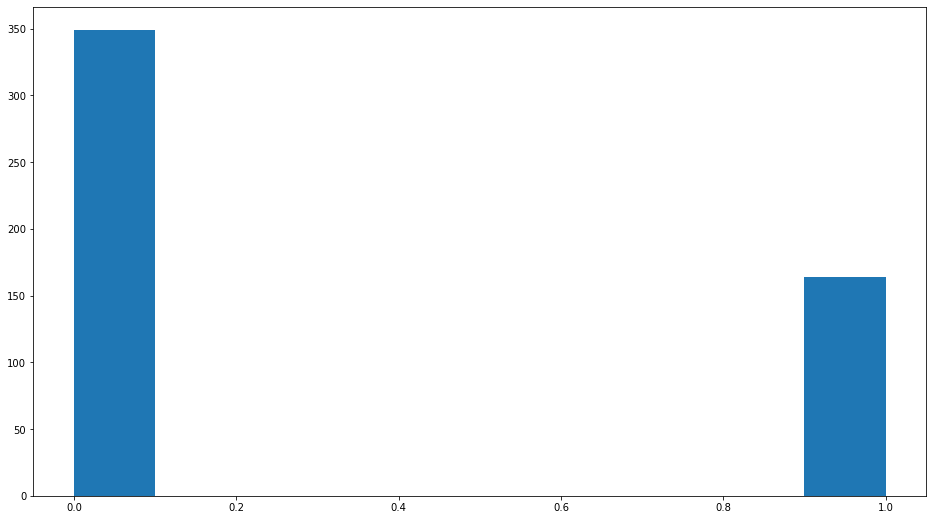

In [60]:
counts, bins = np.histogram(stars_table["Prograde"])

plt.hist(bins[:-1], bins, weights=counts)



In [62]:
# counts, bins = np.histogram(Mg_H)

# plt.hist(bins[:-1], bins, weights=counts)

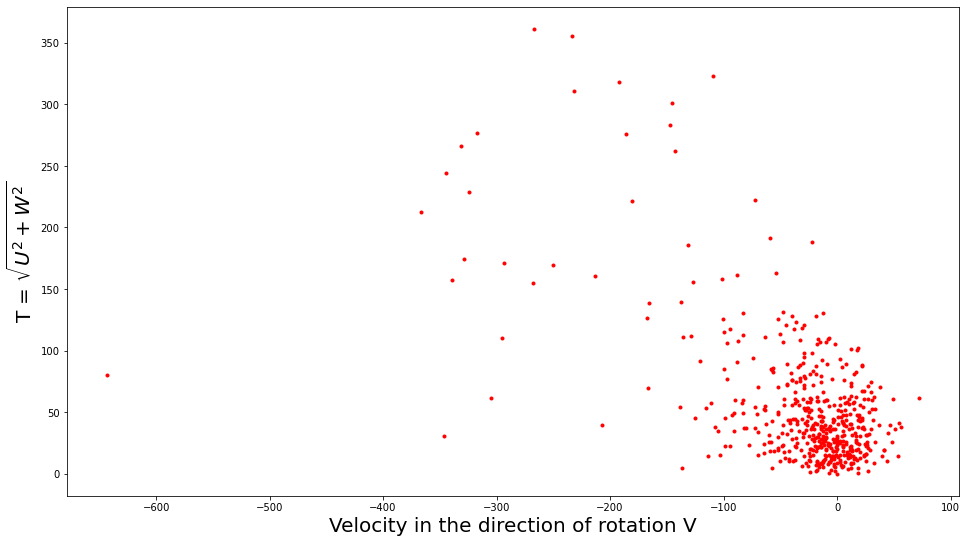

In [52]:
plt.scatter(V, T, marker='.', color='r')
plt.xlabel('Velocity in the direction of rotation V', fontsize=20)
plt.ylabel( r'T = $\sqrt{U^2 + W^2}$', fontsize=20)


plt.show()



In [ ]:
# Questions

# how to write those in the file? 
# how to retrograde vs prograde split? 
# how to save uvw data into the file to not re-run?
# how to save all the values including retrograd vs prograd?
# 
# how to plot histogram retrograd vs prograd
#
# how to on top of that plot histogram mag vs iron for each star
# how to put the code in classes to not be so messy ?

# magn. abundances
# histogram mag vs iron 
# retrograde vs prograde histogram on top ^
# [Mg/H] = [Mg/Fe] - [Fe/H]
# [Mg/H] = [Mg/Fe] - [Fe/H]
# Histogram of [Mg/Fe]
# [Mg/H] vs. [Fe/H] different colors/symbols for prograde vs. retrograde
# 